Ejercicio 5

El archivo aprobacion.csv contiene:
● Horas_estudio: cantidad de horas estudiadas
● Aprobo: 1 si aprobó, 0 si no
Tareas:
1. Crear un modelo de regresión logística para predecir si un estudiante aprueba.
2. Determinar la probabilidad de aprobación para un estudiante que estudia 8 horas.
3. Calcular la matriz de confusión si se considera como aprobado cuando la probabilidad es mayor a 0.5.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

%matplotlib inline

In [8]:
data = pd.read_csv('https://raw.githubusercontent.com/ULP-UGD/Programacion_Avanzada/refs/heads/main/TP12/estudio_aprobacion.csv')
X = data[['Horas_estudio']]
y = data['Aprobo']

modelo = LogisticRegression()
modelo.fit(X, y)

prob_8h = modelo.predict_proba(pd.DataFrame([[8]], columns=['Horas_estudio']))[0, 1]
print(f"Probabilidad de aprobar con 8 horas: {prob_8h:.2%}")

Probabilidad de aprobar con 8 horas: 98.44%


In [9]:
y_pred = modelo.predict(X)
cm = confusion_matrix(y, y_pred)

print("\nMatriz de confusión:")
print(cm)
print("\nReporte de clasificación:")
print(classification_report(y, y_pred))


Matriz de confusión:
[[4 0]
 [0 6]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



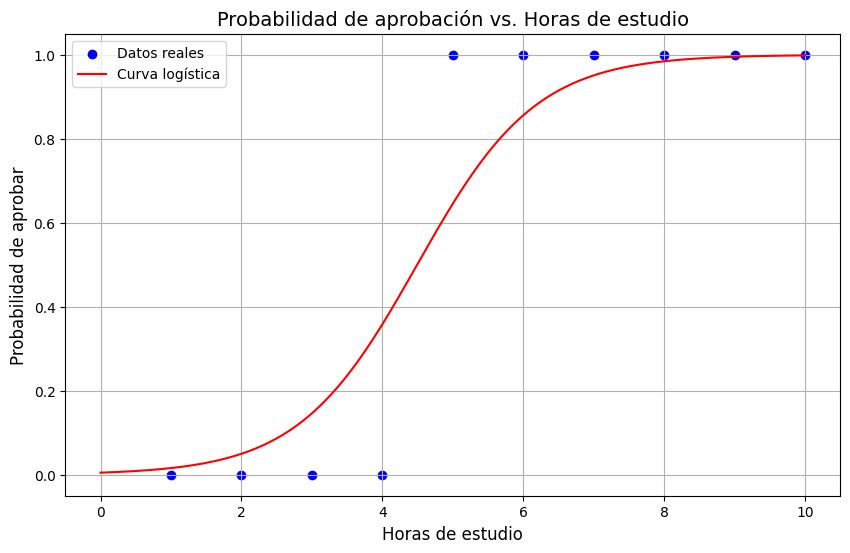

In [10]:
X_test = np.linspace(0, 10, 300).reshape(-1, 1)
y_prob = modelo.predict_proba(X_test)[:, 1]

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X_test, y_prob, 'r-', label='Curva logística')
plt.title('Probabilidad de aprobación vs. Horas de estudio', fontsize=14)
plt.xlabel('Horas de estudio', fontsize=12)
plt.ylabel('Probabilidad de aprobar', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()